In [ ]:
#Problem Statement

In [ ]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seaborn
from scipy import stats
from scipy.stats import norm #for mathematical Population
from sklearn.preprocessing import StandardScaler # for scaling
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from tqdm import tqdm #for fast looping




In [ ]:
#load datasets
train_data=pd.read_csv("/content/drive/MyDrive/CSV/train_dataset.csv")
train_data_salaries=pd.read_csv("/content/drive/MyDrive/CSV/train_salaries.csv")
test_data=pd.read_csv("/content/drive/MyDrive/CSV/test_dataset.csv")


In [ ]:
#Reading first five data points
train_data.head()


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [ ]:
train_data_salaries.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [ ]:
test_data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [ ]:
#Merging our train datasets to create one train dataset
train_data=pd.merge(train_data,train_data_salaries,on='jobId')
train_data

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...,...,...
999995,JOB1362685407682,COMP56,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,JOB1362685407683,COMP24,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JOB1362685407684,COMP23,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,JOB1362685407685,COMP3,CFO,MASTERS,NONE,HEALTH,6,5,149


Since our jobId is unique we won't use it for modelling purpose

In [ ]:
#removing salaries which are less than 30,because it is not expected
train_data=train_data[train_data['salary']>30]

In [ ]:
#columnnames
train_data.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary'],
      dtype='object')

In [ ]:
#info
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   jobId                997548 non-null  object
 1   companyId            997548 non-null  object
 2   jobType              997548 non-null  object
 3   degree               997548 non-null  object
 4   major                997548 non-null  object
 5   industry             997548 non-null  object
 6   yearsExperience      997548 non-null  int64 
 7   milesFromMetropolis  997548 non-null  int64 
 8   salary               997548 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.1+ MB


We can see that earlier there was 1 lakh rows but now 997548 rows, because we removed some rows, whose salaries are less than 30

In [ ]:
#info of test data_set
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [ ]:
#statistical information of numerical columns
train_data.describe()

,yearsExperience,milesFromMetropolis,salary
count,997548.000000,997548.000000,997548.000000
mean,12.015214,49.458372,116.280462
std,7.204992,28.863518,38.512936
min,0.000000,0.000000,31.000000
25%,6.000000,24.000000,89.000000
50%,12.000000,49.000000,114.000000
75%,18.000000,74.000000,141.000000
max,24.000000,99.000000,301.000000


We can see that our mean and Median value's are same for all the three numerical columns, so we can say that they are normally distributed

In [ ]:
#checking_null_values
train_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [ ]:
test_data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
dtype: int64

In [ ]:
#Unique values in each column of a dataset
for x in train_data.columns:
  print(x,':',len(train_data[x].unique()))

jobId : 997548
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100
salary : 265


In [ ]:
#unique value in test dataset
for x in test_data.columns:
  print(x,':',len(test_data[x].unique()))

jobId : 1000000
companyId : 63
jobType : 8
degree : 5
major : 9
industry : 7
yearsExperience : 25
milesFromMetropolis : 100


In [ ]:
#drop jobid and companyid from train_dataset
train_data=train_data.drop(['jobId','companyId'],axis=1)
train_data

,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,CFO,MASTERS,MATH,HEALTH,10,83,130
1,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
...,...,...,...,...,...,...,...
999995,VICE_PRESIDENT,BACHELORS,CHEMISTRY,HEALTH,19,94,88
999996,CTO,HIGH_SCHOOL,NONE,FINANCE,12,35,160
999997,JUNIOR,HIGH_SCHOOL,NONE,EDUCATION,16,81,64
999998,CFO,MASTERS,NONE,HEALTH,6,5,149


We have seen that there are more categorical variable then numerical variable through info

In [ ]:
#creating two empty list to store categorical column names and numerical column names
categorical_list=[]
var_list=[]

#looping through columns to bifercate numerical and categorical
for x in train_data.columns:
  if train_data[x].dtype=='object':
    categorical_list.append(x)
  elif train_data[x].dtype=='int64':
    var_list.append(x)
  elif train_data[x].dtype=='float64':
    var_list.append(x)
    


In [ ]:
print("categorical_list:{}".format(categorical_list))
print("var_list :{}".format(var_list))

categorical_list:['jobType', 'degree', 'major', 'industry']
var_list :['yearsExperience', 'milesFromMetropolis', 'salary']


In [ ]:
#Correlation matrix
corr=train_data.corr()
corr

,yearsExperience,milesFromMetropolis,salary
yearsExperience,1.000000,0.003642,0.370974
milesFromMetropolis,0.003642,1.000000,-0.294435
salary,0.370974,-0.294435,1.000000


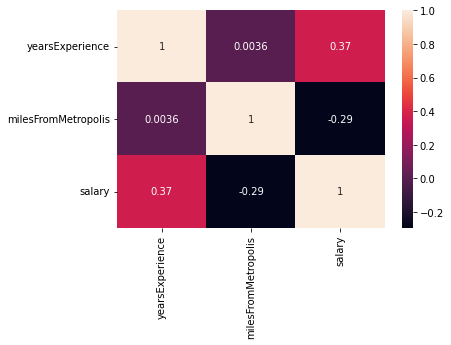

In [ ]:
#heatmap of correlation matrix
seaborn.heatmap(corr,annot=True)

We can see that
1.)yearsExperience is positively correlated with Salary and milesfromMetropolis

Chi-sq-test-It is used to check whether the two categorical variables are independed or not or say uncorrelated or not

In [ ]:
print(categorical_list)

['jobType', 'degree', 'major', 'industry']


H0:There is no relationship between two categorical variable that is they are independent

H1:there is relationship between two categorical variable

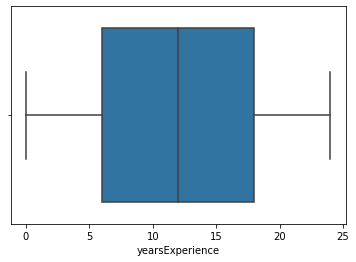

In [ ]:
#Detecting Outlier

seaborn.boxplot('yearsExperience',data=train_data)

We can see that there is no Outlier
1.)25% of Employees have 0 to 7 years of Experience

2.)25% of Employees have 7 to 12 years of Experience

3.)25% of Employees have 12 to 18 years of Experience

4.)25% of Employees have 18 to 25 years of Experience

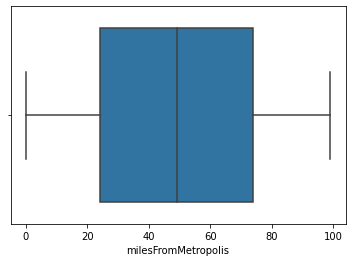

In [ ]:
seaborn.boxplot('milesFromMetropolis',data=train_data)

We can see that there is no outlier

1.)25% of People lives in 0 to 22 miles from Metropolis

2.)25% of People lives in 22 to 50 miles from Metropolis

3.)25% of People lives in 45 to 75 miles from Metropolis

4.)25% of People lives in 75 to 100 miles from Metropolis

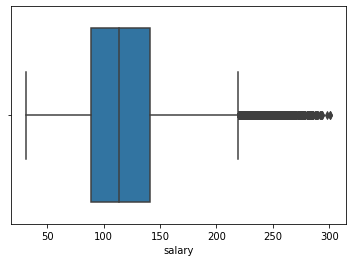

In [ ]:
seaborn.boxplot('salary',data=train_data)

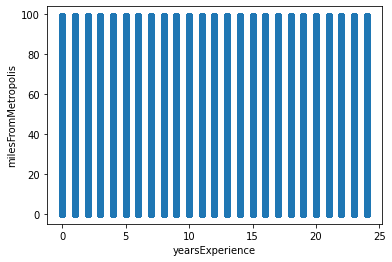

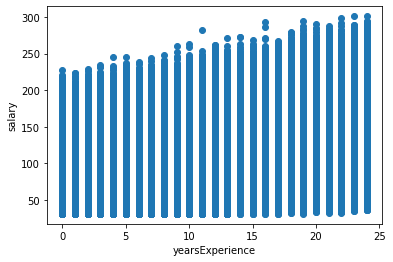

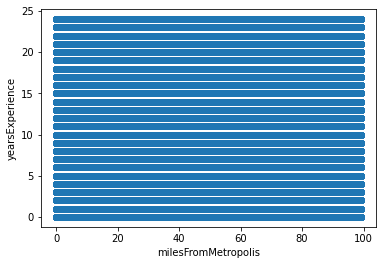

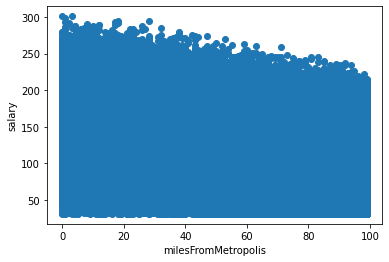

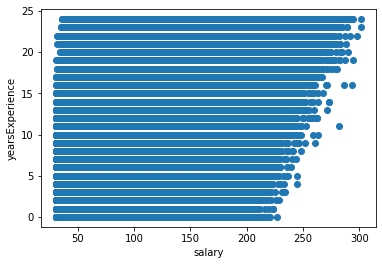

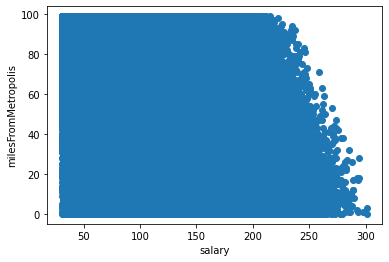

In [ ]:
#Scatterplot using matplotlib
#Create function for ploting

def plot_scatter(x,y):
  plt.figure()
  plt.xlabel(x)
  plt.ylabel(y)
  plt.scatter(train_data[x],train_data[y])
  plt.show()


#loop through the different columns
for i in var_list:
  for j in var_list:
    if i!=j:
      plot_scatter(i,j)


From above scatter plot, we can infer that

1.)Increase in value of yearsExperience results in increase of values on salary axis, and we have seen this quantatively through correlation matrix

2.)Increase in value on milesfromMetropolis results in decrease of value on salary axis, Thus negatively correlated

3.)There is no change in values of yearExperience vs milesFromMetropolis graph, that is there is no correlation between these variables


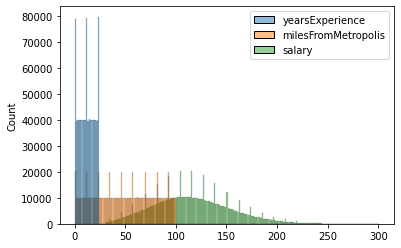

In [ ]:
seaborn.histplot(data=train_data)

We can infer from here that
1.)Salary is normally distributed

2.)miles from metropolis are uniformly distributed

3.)We cannot decode much about year of experience so we will plot separate histogram for that

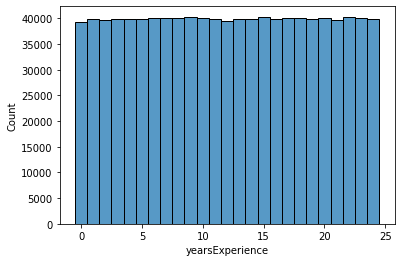

In [ ]:
seaborn.histplot(x="yearsExperience",data=train_data,discrete=True)


We can infer from here that years of experience is also evenly distributed but having some peaks between 10 to 15 years of experience

#Variance Inflation Factor
It is used to check multicollinearity between two variables

1.)The VIF(Variance Inflation Factor) quantifies the extent of correlation between one predictor and the other predictors in a model.

2.)Higher value signifies that it is difficult to impossible to assess accurately the contribution of predictors to a model

3.)Relation between VIF and R^2
VIF=1/(1-R^2)
which translates to Higher the value of R^2,Higher the value of VIF


In [ ]:
#vif
import statsmodels.api as sm


In [ ]:
#creating a dataframe of just numerical values
train_for_vif=train_data.drop(['jobType','degree','major','industry','salary'],axis=1)


#target values
target=train_data['salary']

#numerical values column names
names=['yearsExperience','milesFromMetropolis']
train_for_vif.dropna(inplace=True)


names


['yearsExperience', 'milesFromMetropolis']

In [ ]:
#Calculate VIF for each feature
for i in range(0,len(names)):
  #taking one column as target variable
  y=train_for_vif.loc[:,train_for_vif.columns==names[i]]
  #taking all other remaining columns as feature Variable
  x=train_for_vif.loc[:,train_for_vif.columns!= names[i]]

  #fitting the OLS model on y and x
  model=sm.OLS(y,x)
  results=model.fit()

  #getting the r^2 VALUE of results
  rsq=results.rsquared

  #calculating vif values
  vif=round(1/(1-rsq),2)

  print("R square value of {} column is {} keeping all other column as features".format(names[i],round(rsq,2)))
  print("Variance inflation factor of {} columns is {} \n".format(names[i],vif))



R square value of yearsExperience column is 0.55 keeping all other column as features
Variance inflation factor of yearsExperience columns is 2.22 

R square value of milesFromMetropolis column is 0.55 keeping all other column as features
Variance inflation factor of milesFromMetropolis columns is 2.22 



Conclusion:
1.)Since the value of vif is 2.22 which is close to 2.5, we can say that  yearsExperience and MilesFromMetropolis both have collinearity with all the variables

In [ ]:
#Scaling
#Helper function for scaling all the numerical data using MInMaxScaler

def scale_data(df,col):
  from sklearn.preprocessing import MinMaxScaler
  scaler=MinMaxScaler()

  df[col]=scaler.fit_transform(df[col])
  return df



In [ ]:
#Making a list of the column names to be scaled
col_train=['yearsExperience','milesFromMetropolis']
train_data=scale_data(train_data,col_train)

#Modelling 
#One hot Encoding
A one hot Encoding can be applied to the categorical representation.This is where the categorical variables are removed, and a new variable is added for each unique categorical Value

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   jobType              997548 non-null  object 
 1   degree               997548 non-null  object 
 2   major                997548 non-null  object 
 3   industry             997548 non-null  object 
 4   yearsExperience      997548 non-null  float64
 5   milesFromMetropolis  997548 non-null  float64
 6   salary               997548 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 93.1+ MB


In [ ]:
#checking unique value of each column and their value count
train_data['jobType'].value_counts()

SENIOR            125886
VICE_PRESIDENT    125234
MANAGER           125120
CTO               125045
CEO               124778
JUNIOR            124554
CFO               124369
JANITOR           122562
Name: jobType, dtype: int64

Conclusion-We can see that there are 8 sub jobtype in Company

In [ ]:
#Similarly check for other categorical value
train_data['degree'].value_counts()

HIGH_SCHOOL    235769
NONE           235612
BACHELORS      175495
DOCTORAL       175362
MASTERS        175310
Name: degree, dtype: int64

Conclusion-We can see that Employees in the company have this much level of Education.

In [ ]:
train_data['major'].value_counts()

NONE           529906
CHEMISTRY       58875
LITERATURE      58684
ENGINEERING     58594
BUSINESS        58518
PHYSICS         58410
COMPSCI         58382
BIOLOGY         58379
MATH            57800
Name: major, dtype: int64

Conclusion-Employees have done major in these fields of Education

In [ ]:
train_data['industry'].value_counts()

WEB          143205
FINANCE      142866
OIL          142770
AUTO         142766
HEALTH       142736
SERVICE      142056
EDUCATION    141149
Name: industry, dtype: int64

Conclusion-There are 143205 employees working in web industry, and 142866 employees working in Finance industry, 142770 employees working in Oil Industry and so on

In [ ]:
#Split the labels and the targets
train_X=train_data.drop(['salary'],axis=1)
train_Y=train_data['salary']

#One hot Encoding
train_X=pd.get_dummies(train_X,columns=['jobType','degree','major','industry'])
print(train_X)

        yearsExperience  milesFromMetropolis  jobType_CEO  jobType_CFO  \
0              0.416667             0.838384            0            1   
1              0.125000             0.737374            1            0   
2              0.416667             0.383838            0            0   
3              0.333333             0.171717            0            0   
4              0.333333             0.161616            0            0   
...                 ...                  ...          ...          ...   
999995         0.791667             0.949495            0            0   
999996         0.500000             0.353535            0            0   
999997         0.666667             0.818182            0            0   
999998         0.250000             0.050505            0            1   
999999         0.833333             0.111111            0            0   

        jobType_CTO  jobType_JANITOR  jobType_JUNIOR  jobType_MANAGER  \
0                 0                0  

The Salary column was not scaled because that's our target Variable, we want it raw, Second there was a scope of scaling it but then again we have to inverse it!

In [ ]:
#Checking information regarding columns after Scaling and One hot Encoding
train_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997548 entries, 0 to 999999
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   yearsExperience         997548 non-null  float64
 1   milesFromMetropolis     997548 non-null  float64
 2   jobType_CEO             997548 non-null  uint8  
 3   jobType_CFO             997548 non-null  uint8  
 4   jobType_CTO             997548 non-null  uint8  
 5   jobType_JANITOR         997548 non-null  uint8  
 6   jobType_JUNIOR          997548 non-null  uint8  
 7   jobType_MANAGER         997548 non-null  uint8  
 8   jobType_SENIOR          997548 non-null  uint8  
 9   jobType_VICE_PRESIDENT  997548 non-null  uint8  
 10  degree_BACHELORS        997548 non-null  uint8  
 11  degree_DOCTORAL         997548 non-null  uint8  
 12  degree_HIGH_SCHOOL      997548 non-null  uint8  
 13  degree_MASTERS          997548 non-null  uint8  
 14  degree_NONE         

In [ ]:
#Checking our salary column
train_Y.head()

0    130
1    101
2    137
3    142
4    163
Name: salary, dtype: int64

In [ ]:
#importing sklearn library for spliting train_dataset into train and test dataset

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(train_X,train_Y,test_size=0.2)

In [ ]:
import math
import sklearn.metrics as metrics
from sklearn.metrics import median_absolute_error

#Function for calculating RMSE
def rmse(x,y):

  return math.sqrt(((x-y)**2).mean())

  #Function for calculating all the relevant metrices
def print_scores(m):
    res=[rmse(m.predict(X_train),Y_train),rmse(m.predict(X_test), Y_test),
         m.score(X_train,Y_train),m.score(X_test,Y_test),
         median_absolute_error(m.predict(X_train),Y_train), median_absolute_error(m.predict(X_test), Y_test),
         metrics.mean_absolute_error(m.predict(X_train),Y_train),metrics.mean_absolute_error(m.predict(X_test),Y_test),
       
       ]

    print("RMSE-Train: " + str(res[0]) + "\nRMSE-Test: " + str(res[1]) + "\nScore-Train: " + str(res[2]) + "\nScore-Test: " + str(res[3]) +
         "\nMedAE-Train: " + str(res[4]) + "\nMedAE-Test: " + str(res[5]) + "\nMeanAE-Train: " + str(res[6]) + "\nMeanAE-Test: " + str(res[7]),'\n')


In [ ]:
# Visualize importance of all the features in the dataset for the prediction

def visualize_importance(feature_importances, feat_train_df):
    
    # creating two empty dataframe for feature name and feature importance
    feature_importance_df = pd.DataFrame()

    _df = pd.DataFrame()
    _df['feature_importance'] = feature_importances
    _df['column'] = feat_train_df.columns
    feature_importance_df = pd.concat([feature_importance_df,_df],axis=0,ignore_index=True)
    

    # grouping all data and sorting in descending order
    order = feature_importance_df.groupby('column')\
    .sum()[['feature_importance']]\
    .sort_values('feature_importance',ascending=False).index[:50]
    


    
    # ploting feature importance data using boxenplot
    fig, ax = plt.subplots(figsize=(8, max(6, len(order) * .25)))
    seaborn.boxenplot(data=feature_importance_df,x='feature_importance',
                      y='column',order=order,ax=ax,palette='viridis',orient='h')
    ax.set_title('Importance')
    ax.grid()
    fig.tight_layout()
    return fig,ax

    
    






The employee salaries dataset has 1000000 samples.

We will use only 50000 samples for training

Using complete dataset will take longer time to train the model, therefore we will use only 50000

RMSE-Train: 19.620269952270487
RMSE-Test: 19.653586743416827
Score-Train: 0.7403154918148557
Score-Test: 0.7401769956312185
MedAE-Train: 13.7540283203125
MedAE-Test: 13.79736328125
MeanAE-Train: 15.864103206950496
MeanAE-Test: 15.89087019667913 

CPU times: user 2.49 s, sys: 733 ms, total: 3.22 s
Wall time: 2.1 s


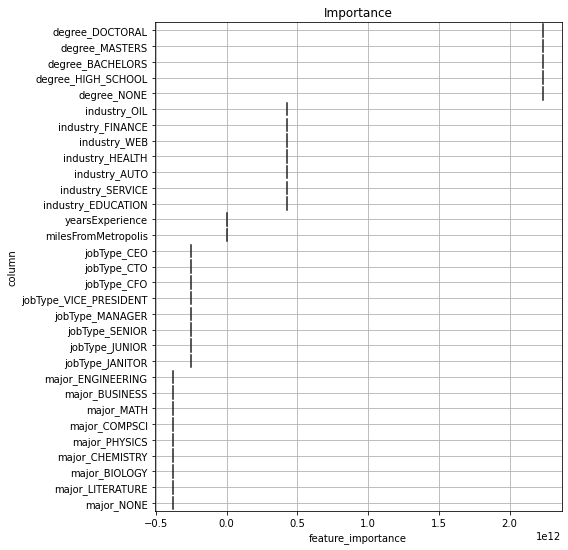

In [ ]:
%%time
# Fit a Linear Regression model to the train dataset

# Import LinearRegressor
from sklearn.linear_model import LinearRegression

# Instantiate the model
lm = LinearRegression()

# Fit the model to the data
lm.fit(X_train,Y_train)



# print score of the model
print_scores(lm)


#Visualize the importance of feature
fig, ax=visualize_importance(lm.coef_,train_X)


We can see that thr r2 score is 74%, which means 74% variation in Y is explained by Independent Variable in train and test Datset

Random Forest Regressor

Random forest is a flexible, easy to use machine learning algorithm that produces, even without hyper-parameter tuning, a great result most of the time. It is also one of the most used algorithms, because of its simplicity and diversity.




RMSE-Train: 20.04151143106812
RMSE-Test: 20.63212720336873
Score-Train: 0.7290450892149694
Score-Test: 0.7136600308142982
MedAE-Train: 13.129999999999995
MedAE-Test: 13.988
MeanAE-Train: 15.832251254183387
MeanAE-Test: 16.492169393088464 

CPU times: user 2min 35s, sys: 360 ms, total: 2min 35s
Wall time: 2min 36s


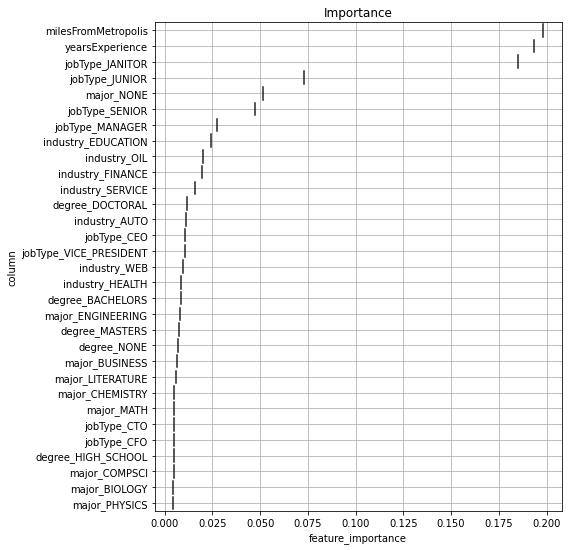

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Import RandomForrestRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
rf=  RandomForestRegressor()


# Fit the model to the data
rf.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])




# print score of the model
print_scores(rf)


# visualizing the inportance of features.
fig, ax=visualize_importance(rf.feature_importances_,train_X.iloc[1:50000])





The r2 score is near about 72% in train and test_dataset
that means 30% of variation in salary is explained by Independent Variable

Gradient Boosting Algorithm


Gradient Boosting Algorithm is generally used when we want to decrease the Bias error. it builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.

In [ ]:
%%time
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
GBR = GradientBoostingRegressor()


#fitting the model
GBR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])



# print score of the model

print_scores(GBR)


# visualizing the importance of features.
fig, ax = visualize_importance(GBR.feature_importances_,train_X.iloc[1:50000])

The R2score using Gradient Boosting Algorithm is 74% for both train and test dataset. and in boxen plot we see that most important features are 
'yearsExperience'and 'jobType_JANITOR'.

Decision Tree

Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes

In [ ]:
%%time
# Fit a Decision Tree Regressor model to the train dataset

# Import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

# Instantiate the model
DTR = DecisionTreeRegressor()

#fitting the model
DTR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])



# print score of the model
print_scores(DTR)

#visulizing feature importance

fig, ax = visualize_importance(DTR.feature_importances_,train_X.iloc[1:50000])


The R2score using Decision Tree Algorithm is 51% for train and 47% for test dataset. and in boxen plot we see that most important features are 'milesfromMetropolis'and 'yearsExperience'.



#XGBOOST
XGBoost is an ensemble learning method. Sometimes, it may not be sufficient to rely upon the results of just one machine learning model. Ensemble learning offers a systematic solution to combine the predictive power of multiple learners. The resultant is a single model which gives the aggregated output from several models.

In [ ]:
%%time
# Fit a XGB Regressor model to the train dataset

# Import XGBRegressor
from xgboost import XGBRegressor

# Instantiate the model
xgbr = XGBRegressor()


# Fit the model to the data
xgbr.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])


# print score of the model
print_scores(xgbr)

#visualizing the importance of features
fig, ax = visualize_importance(xgbr.feature_importances_,train_X.iloc[1:50000])



The R2score using XGBoost Algorithm is 74% for train and 74% for test dataset. and in boxen plot we see that most important features are 'jobType Janitor'and 'major_none'.

#Comparing all the model based on metric

In [ ]:
# the libraries we need
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
def compare_models(models,names,X_train,y_train,X_test,y_test):


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
      return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
      y_pred= model.predict(X_test) # then predict on the test set
      res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
                metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
                metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
                metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
      df_train[name] = [res[0], res[2], res[4], res[6]]
      df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test

In [ ]:
# list of models object
# list of models name
models= [lm,rf,GBR,DTR, xgbr]
names = ['Lr', 'Forest', 'GBR','DecisionTree', 'Xboost']
comp_model_train,comp_model_test = compare_models(models,names,X_train,Y_train,X_test,Y_test)

In [ ]:
#Printing rmse comparison of model on train and test

print(comp_model_train[:1])
print('\n')
print(comp_model_test[:1])

In [ ]:
#Printing comparison of model on train and test
print("Results on test data")
comp_model_test

#Hyperparameter Tuning

In [ ]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_Search(model,X_train, Y_train,param_grid):
  from sklearn.model_selection import RandomizedSearchCV

  # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
  random = RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=20,cv=3,verbose=2,random_state=42,n_jobs=-1
                              )
  random.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])
  print(random.best_params_)
  
  

In [ ]:
# create parameters dict for tunning
rf_para_grid = {'n_estimators': [1, 2, 4, 8, 16, 32, 64, 100, 200],
               'max_features': ['auto', 'sqrt'],
               'max_depth': np.linspace(1, 32, 32, endpoint=True),
               'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
               'bootstrap': [True, False]}

# passing data for hyper parameter tunning with Randomized search cv

random_Search(RandomForestRegressor(),X_train,Y_train,param_grid=rf_para_grid)

In [ ]:
#import GradientBoostingRegressor
# create GradientBoostRegressor parameters dict for tunning
GBR_para_grid = {
'n_estimators':  [1, 2, 4, 8, 16, 32, 64, 100, 200], 
 'learning_rate' : [1, 0.5, 0.25, 0.1, 0.05, 0.01],
 'max_depth': np.linspace(1, 32, 32, endpoint=True), 
 'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True)
}

# passing data for hyper parameter tunning with Random

random_Search(GradientBoostingRegressor(),X_train,Y_train,param_grid=GBR_para_grid)



RMSE-Train: 30.440241813977806
RMSE-Test: 30.438352840952962
Score-Train: 0.37492478166338883
Score-Test: 0.37678735783277906
MedAE-Train: 20.93607305936061
MedAE-Test: 20.93607305936061
MeanAE-Train: 24.37971896624735
MeanAE-Test: 24.377111023733324 

CPU times: user 10.9 s, sys: 78.8 ms, total: 10.9 s
Wall time: 10.9 s


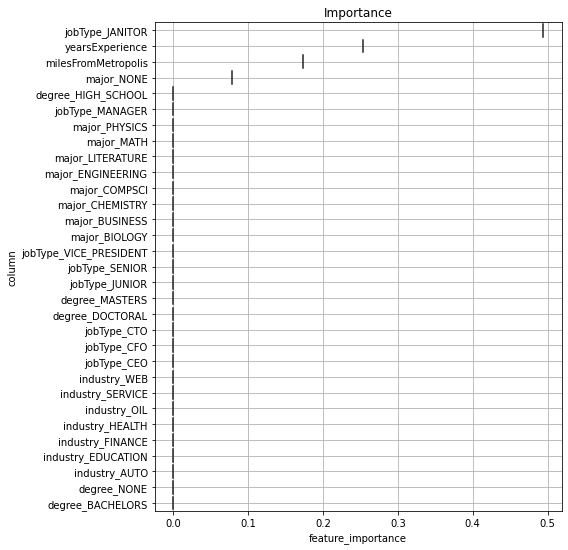

In [ ]:
%%time
# Fit a Random Forest Regressor model to the train dataset

# Instantiate the model
rf= RandomForestRegressor(**{'n_estimators':64,'min_samples_leaf': 0.1, 'max_features': 'auto', 'max_depth': 27.0, 'bootstrap': False})



# Fit the model to the data
rf.fit(X_train.iloc[1:10000],Y_train.iloc[1:10000])


# print score of the model
print_scores(rf)


# visualizing the inportance of features.
fig, ax = visualize_importance(rf.feature_importances_,train_X.iloc[1:1000])


In [ ]:
%%time
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Fit a Gradient Boosting Regressor model to the train dataset

# Instantiate the model
GBR = GradientBoostingRegressor(**{'n_estimators': 100, 'min_samples_split': 0.4, 'max_depth': 30.0, 'learning_rate': 0.1})

GBR.fit(X_train.iloc[1:50000],Y_train.iloc[1:50000])



# print score of the model
print_scores(GBR)


# visualizing the inportance of features.
fig, ax = visualize_importance(GBR.feature_importances_,train_X.iloc[1:50000])

In [ ]:
models=[rf,GBR]
names=['forest','GBR']

comp_model_train, comp_model_test=compare_models(models,names,X_train,Y_train,X_test,Y_test)

In [ ]:
print("Metrics on train data")
comp_model_train

We can see that random forest has negatice r^2 on train_data

In [ ]:
print("Metrics on test data")
comp_model_test

Here we can also random forest has negative r^2, therefore we will select GBR as our model to predict

#Now working on the test dataset provided

In [ ]:
#test data

test_X=test_data
test_X.head()

In [ ]:
#shape
test_X.shape

In [ ]:
#scale
col_to_be_scaled=['yearsExperience','milesFromMetropolis']
test_X=scale_data(test_X,col_to_be_scaled)

In [ ]:
test_X

In [ ]:
test_X=pd.get_dummies(test_X,columns=['jobType','degree','major','industry'])


In [ ]:
test_X.head()


In [ ]:
test_X=test_X.drop(['jobId','companyId'],axis=1)

In [ ]:
#seeing our test_data
test_X.head()

In [ ]:
#Perform the prediction on the test dataset
y_predicted=GBR.predict(test_X)
y_predicted

In [ ]:
#creating a dataframe of predicted results
predictions=pd.DataFrame(y_predicted)  

In [ ]:
#predicted values in DataFrame
predictions